In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import math

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

In [3]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def hough_lines_new(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines_new(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [4]:
def color_select(image) :
    print(image.shape)
    ysize = image.shape[0]
    xsize = image.shape[1]
    color_select = np.copy(image)

    # Define color selection criteria
    ###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION

    keep_value = 200

    red_threshold = keep_value
    green_threshold = keep_value
    blue_threshold = keep_value
    ######

    rgb_threshold = [red_threshold, green_threshold, blue_threshold]

    # Do a boolean or with the "|" character to identify
    # pixels below the thresholds
    thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
    color_select[thresholds] = [0,0,0]
    return color_select

In [5]:
def yellowscale(image):
    #enhance yellow then find grayscale
        
    #RGB limits
    lower = np.array([80,80,40])
    upper = np.array([255,255,80])
    
    # Threshold the HSV image to get only yellow colors
    mask = cv2.inRange(image, lower, upper)
    #show_image('mask',mask)
 
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(image,image, mask= mask)
    res = cv2.addWeighted(res, 1.0, image, 1.0, 0)  
#     res = grayscale(res)
 
    return res

def yellowscale_new(image):
    r = np.copy(image)
    for i in range(10):
        r = yellowscale(r)
 
    return r

In [6]:
def draw_lines_new(img, lines, color=[255, 0, 0], thickness=5):
#     m_neg = 0
#     m_neg_counter = 0
   
#     m_pos = 0
#     m_pos_counter = 0

#     # Automating process of selecting range of slope
#     # So, that we don't have to set it manually every time
#     for line in lines:
#         for x1,y1,x2,y2 in line:
#             m = (y2-y1)/(x2-x1)

#             if m < 0 and m > -1:
#                 m_neg += m
#                 m_neg_counter += 1

#             elif m > 0 and m < 1:
#                 m_pos += m
#                 m_pos_counter += 1

#     m_neg_avg  = m_neg / m_neg_counter
#     m_pos_avg = m_pos / m_pos_counter
                
#     print(m_neg_avg)
#     print(m_pos_avg)
    
    m_neg_avg = -0.6
    m_pos_avg = 0.6
    
    left_slope = 0
    left_counter = 0
    left_lane = list()
    
    right_slope = 0
    right_counter = 0
    right_lane = list()
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            m = (y2-y1)/(x2-x1)
        
            threshold = 0.10
            if m >= (m_neg_avg - threshold) and m <= (m_neg_avg + threshold):
                left_slope += m
                left_counter += 1
                left_lane.append((x2, y2))
                
            # +ve slope -> Right Lane
            elif m >= (m_pos_avg - threshold) and m <= (m_pos_avg + threshold):
                right_slope += m
                right_counter += 1
                right_lane.append((x1, y1))
            

    left_lane = sorted(left_lane) 
    right_lane = sorted(right_lane)
    
    x_min = 0
    x_max = img.shape[1]
    
    y_min = 0
    y_max = img.shape[0]
     
    left_present = True
    right_present = True
    
    if len(left_lane) != 0:
        left_slope_avg = left_slope/left_counter
        left_start = left_lane[-1]
        x_left = int((y_max - left_start[1] + left_slope_avg * left_start[0])/(left_slope_avg))
        
        if x_left < 0 or x_left > x_max :
            x_left = 0
          
        cv2.line(img, left_start, (x_left, y_max), color, thickness)
        
    else :
        left_slope_avg = - 0.60
        left_start = (int(x_max / 2), int(y_max/2))
        x_left = 0
        
        left_present = False
        

    if len(right_lane) != 0:
        right_slope_avg = right_slope/right_counter
        right_start = right_lane[0]
        x_right = int((y_max - right_start[1] + right_slope_avg * right_start[0])/(right_slope_avg))
        if x_right < 0 or x_right > x_max :
            x_right = x_max
            
        cv2.line(img, right_start, (x_right, y_max), color, thickness)
    else :
        right_slope_avg = 0.60
        right_start = (int(x_max / 2), int(y_max/2))
        x_right = x_max
        
        right_present = False

In [7]:
def draw_lines_avg(img, lines, all_lines, no_OfImgToAvg, color=[255, 0, 0], thickness=5):   
    m_neg_avg, m_pos_avg = -0.7, 0.7 
    
    left_slope, left_counter = 0, 0
    right_slope, right_counter = 0, 0
    left_lane, right_lane = list(), list()
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            m = (y2-y1)/(x2-x1)
            
#             print(m)
            
            threshold = 0.20
            if m >= (m_neg_avg - threshold) and m <= (m_neg_avg + threshold):
                left_slope += m
                left_counter += 1
                left_lane.append((x2, y2))
                
            # +ve slope -> Right Lane
            elif m >= (m_pos_avg - threshold) and m <= (m_pos_avg + threshold):
                right_slope += m
                right_counter += 1
                right_lane.append((x1, y1))
            

    left_lane, right_lane = sorted(left_lane), sorted(right_lane) 
    
    x_min, x_max = 0, img.shape[1] 
    y_min, y_max = 0, img.shape[0]
    
    if len(left_lane) != 0:
        left_slope_avg = left_slope/left_counter
        left_start = left_lane[-1]
        x_left = int((y_max - left_start[1] + left_slope_avg * left_start[0])/(left_slope_avg))
        
        if x_left < 0 or x_left > x_max :
            x_left = 0
          
        
        l_x1, l_y1 = left_start[0], left_start[1]
        l_x2, l_y2 = x_left, y_max  
        
        if l_x1 == l_x2:
            l_x1, l_x2 = -1, -1
        if l_y1 == l_y2:
            l_y1, l_y2 = -1, -1
        
    else : # No Left Lane detected in this frame
        left_slope_avg = - 0.60
        
        l_x1, l_y1 = -1, -1
        l_x2, l_y2 = -1, -1
        

    if len(right_lane) != 0:
        right_slope_avg = right_slope/right_counter
        right_start = right_lane[0]
        x_right = int((y_max - right_start[1] + right_slope_avg * right_start[0])/(right_slope_avg))
        if x_right < 0 or x_right > x_max :
            x_right = x_max
            
        r_x1, r_y1 = right_start[0], right_start[1]
        r_x2, r_y2 = x_right, y_max
        
        if r_x1 == r_x2:
            r_x1, r_x2 = -1, -1
        if r_y1 == r_y2:
            r_y1, r_y2 = -1, -1

    else : # No Left Lane detected in this frame
        right_slope_avg = 0.60
        
        r_x1, r_y1 = -1, -1
        r_x2, r_y2 = -1, -1
        
    points_left = (l_x1, l_y1, l_x2, l_y2)
    points_right = (r_x1, r_y1, r_x2, r_y2)
    all_lines[0].append(points_left)
    all_lines[1].append(points_right)
    
    if(len(all_lines) != 0) :
        # Left
        if(len(all_lines[0]) < no_OfImgToAvg) :
            useful_points_left = all_lines[0][-(len(all_lines[0])-1):]
        else :
            useful_points_left = all_lines[0][-no_OfImgToAvg:]
        
        # Right
        if(len(all_lines[1]) < no_OfImgToAvg) :
            useful_points_right = all_lines[1][-(len(all_lines[1])-1):]
        else :
            useful_points_right = all_lines[1][-no_OfImgToAvg:]
    
    useless_index_left = list()
    useless_index_right = list()
    for points in useful_points_left:
        if (-1 in points) or (0 in points):
            useless_index_left.append(useful_points_left.index(points))
    for points in useful_points_right:
        if (-1 in points) or (0 in points):
            useless_index_right.append(useful_points_right.index(points))
            
    for useless in useless_index_left :
        del useful_points_left[useless]
    for useless in useless_index_right :
        del useful_points_right[useless]
        
    x1_l, y1_l, x2_l, y2_l = 0,0,0,0
    x1_r, y1_r, x2_r, y2_r = 0,0,0,0
    avg_length = 0
    avg_length_counter = 0
    for points in useful_points_left :
        x1_l += points[0]
        y1_l += points[1]
        x2_l += points[2]
        y2_l += points[3]
        length = np.sqrt((points[3]-points[1])**2 + (points[2]-points[0])**2)
        avg_length += length
        avg_length_counter +=1
        
    for points in useful_points_right :
        x1_r += points[0]
        y1_r += points[1]
        x2_r += points[2]
        y2_r += points[3]
        length = np.sqrt((points[3]-points[1])**2 + (points[2]-points[0])**2)
        avg_length += length
        avg_length_counter +=1
        
    avg_length /= avg_length_counter
#     print(avg_length)
    
    if (len(useful_points_left) != 0) :
        x1_l /= len(useful_points_left)
        y1_l /= len(useful_points_left)
        x2_l /= len(useful_points_left)
        y2_l /= len(useful_points_left)
        
        if y2_l > y1_l :
            x1, y1, x2, y2 = x1_l, y1_l, x2_l, y2_l
        else:
            x1, y1, x2, y2 = x2_l, y2_l, x1_l, y1_l
        
        # Checking for higher jump
        if len(useful_points_left) > 1:
            x1_, y1_, x2_, y2_ = useful_points_left[-2]
            delta = abs(x1-x1_)+abs(y1-y1_)+abs(x2-x2_)+abs(y2-y2_)
            if(delta > 200):
                if x1 != x2 and y1 != y2:    
                    m = (y2-y1)/(x2-x1)
                    l = np.sqrt((y2-y1)**2+(x2-x1)**2)
                    if l < 0.9*avg_length:
                        fac = np.sqrt(l**2/(m**2+1))
                        x1_new = x2 + fac
                        y1_new = y2 + m*fac
                    else :
                        x1_new, y1_new = x1, y1
            # Delta > 200
            else :
                x1_new, y1_new = x1_, y1_
                x2, y2 = x2_, y2_
        else:
            x1_new, y1_new = x1, y1
            
        points_left = (x1_new, y1_new, x2, y2)
        x1_l, y1_l, x2_l, y2_l = int(x1_new), int(y1_new), int(x2), int(y2)
        cv2.line(img, (x1_l, y1_l), (x2_l, y2_l), color, thickness)

    if (len(useful_points_right) != 0) :
        x1_r /= len(useful_points_right) 
        y1_r /= len(useful_points_right)
        x2_r /= len(useful_points_right)
        y2_r /= len(useful_points_right)
        
        if y2_r > y1_r :
            x1, y1, x2, y2 = x1_r, y1_r, x2_r, y2_r
        else:
            x1, y1, x2, y2 = x2_r, y2_r, x1_r, y1_r
            
        # Checking for higher jump
        if len(useful_points_right) > 1:
            x1_, y1_, x2_, y2_ = useful_points_right[-2]
            delta = abs(x1-x1_)+abs(y1-y1_)+abs(x2-x2_)+abs(y2-y2_)
            if(delta < 200):
                if x1 != x2 and y1 != y2:        
                    m = (y2-y1)/(x2-x1)
                    l = np.sqrt((y2-y1)**2+(x2-x1)**2)
                    if l < 0.9*avg_length:
                        fac = np.sqrt(l**2/(m**2+1))
                        x1_new = x2 - fac
                        y1_new = y2 - m*fac
                    else :
                        x1_new, y1_new = x1, y1
            # Delta > 200
            else :
                x1_new, y1_new = x1_, y1_
                x2, y2 = x2_, y2_

        else:
            x1_new, y1_new = x1, y1
            
        points_right = (x1_new, y1_new, x2, y2)
        x1_r, y1_r, x2_r, y2_r = int(x1_new), int(y1_new), int(x2), int(y2)
        cv2.line(img, (x1_r, y1_r), (x2_r, y2_r), color, thickness)
    
    return img, [points_left, points_right]

In [8]:
def hough_lines_avg(img, rho, theta, threshold, min_line_len, max_line_gap, all_lines, no_OfImgToAvg):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    image_new, points_list = draw_lines_avg(line_img, lines, all_lines, no_OfImgToAvg)
    return line_img, points_list

[(505.0, 319.0, 169.0, 540.0), (503.0, 314.0, 849.0, 540.0)]


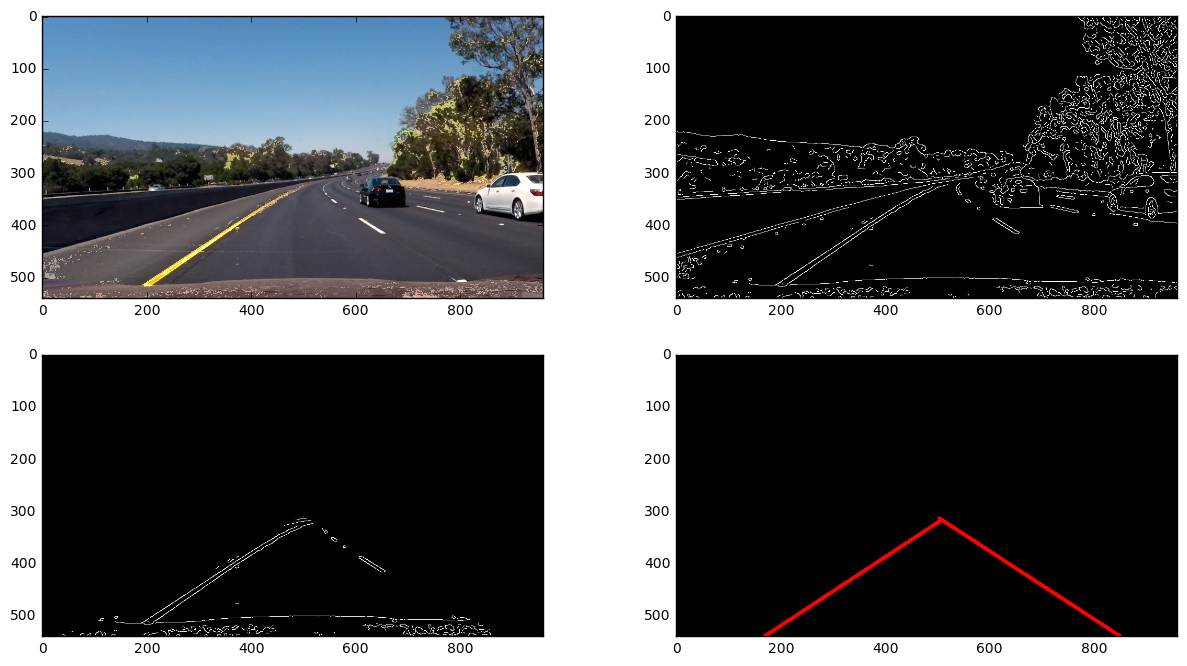

In [9]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
c1_img = mpimg.imread('c_8.jpg')
if c1_img.shape[2] != 3:
    c1_img = c1_img[:,:,:-1]
c1_col = yellowscale_new(c1_img)
# c1_colSel = color_select(c1_img)
c1_grey = grayscale(c1_col)
c1_smooth = gaussian_blur(c1_grey, 11)
c1_canny = canny(c1_smooth, 40, 50)
mask = np.array([ [30,540], [875,540], [500,310] ], np.int32)
c1_mask = region_of_interest(c1_canny, [mask])
#  all_lines, no_OfImgToAvg,
c1_hough, points_list = hough_lines_avg(c1_mask, 1, (np.pi/180), 15, 20, 20, [[],[]], 10)
print(points_list)


# fig = plt.figure()
# fig.add_subplot(111)

# plt.figure()
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.imshow(c1_col, cmap='Greys_r')

# plt.figure()
plt.subplot(2,2,2)
plt.imshow(c1_canny, cmap='Greys_r')

# plt.figure()
plt.subplot(2,2,3)
plt.imshow(c1_mask, cmap='Greys_r')

# plt.figure()
plt.subplot(2,2,4)
plt.imshow(c1_hough, cmap='Greys_r')


## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [10]:
import os
os.listdir("test_images/")

['.DS_Store',
 'Icon\r',
 'solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

run your solution on all test_images and make copies into the test_images directory).

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [12]:
# c1_hough, points_list = hough_lines_avg(c1_mask, 2, (np.pi/180), 20, 5, 20, [[],[]], 10)
all_points = [[],[]]

def process_image(image):
    c1_img = image
    c1_col = yellowscale_new(c1_img)
    # c1_colSel = color_select(c1_img)
    c1_grey = grayscale(c1_col)
    c1_smooth = gaussian_blur(c1_grey, 11)
    c1_canny = canny(c1_smooth, 40, 50)
    mask = np.array([[30,540], [875,540], [500,310]], np.int32)
    c1_mask = region_of_interest(c1_canny, [mask])
    c1_hough, points_list = hough_lines_avg(c1_mask, 1, (np.pi/180), 15, 20, 20, all_points, 10)
    all_points.append(points_list)
    c1_weight = weighted_img(c1_hough, image)
    return c1_weight

Let's try the one with the solid white lane on the right first ...

In [34]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4



100%|█████████▉| 221/222 [00:19<00:00, 11.21it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 12.2 s, sys: 2.55 s, total: 14.8 s
Wall time: 20.7 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [36]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4



100%|█████████▉| 681/682 [01:04<00:00, 10.52it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 38.1 s, sys: 7.11 s, total: 45.2 s
Wall time: 1min 6s


In [37]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [43]:
# c1_hough, points_list = hough_lines_avg(c1_mask, 2, (np.pi/180), 20, 5, 20, [[],[]], 10)
all_points = [[],[]]

def process_image_c(image):
    c1_img = image
    c1_col = yellowscale_new(c1_img)
    # c1_colSel = color_select(c1_img)
    c1_grey = grayscale(c1_col)
    c1_smooth = gaussian_blur(c1_grey, 7)
    c1_canny = canny(c1_smooth, 100, 150)
    mask = np.array([[150,720], [1200,720], [720,420], [600,420]], np.int32)
    c1_mask = region_of_interest(c1_canny, [mask])
#     c1_hough = hough_lines(c1_mask, 1, (np.pi/180), 15, 20, 20)
    c1_hough, points_list = hough_lines_avg(c1_mask, 1, (np.pi/180), 15, 5, 20, all_points, 10)
    all_points.append(points_list)
    c1_weight = weighted_img(c1_hough, image)
    return c1_weight

# c1_smooth = gaussian_blur(c1_grey, 7)
# c1_canny = canny(c1_smooth, 100, 150)
# mask = np.array([[150,720], [1200,720], [720,420], [600,420]], np.int32)
# c1_mask = region_of_interest(c1_canny, [mask])
# #  all_lines, no_OfImgToAvg,
# c1_hough, points_list = hough_lines_avg(c1_mask, 2, (np.pi/180)*1, 15, 5, 20, [[],[]], 10)

In [44]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
i = 0
# for frame in clip2.iter_frames():
#     f = process_image_c(frame)
#     print(i)
#     plt.figure()
#     plt.imshow(f, cmap='Greys_r')
#     i += 1

frame_list = list()

for frame in clip2.iter_frames():
    frame_list.append(frame)
#     if i > 150:
#         break;
#     i += 1

[(645.0, 442.0, 236.0, 720.0), (675.0, 422.0, 1164.0, 720.0)]
[(662.0, 420.0, 206.0, 720.0), (663.0, 420.0, 1125.0, 720.0)]
[(727.0, 432.0, 311.0, 720.0), (544.0, 482.0, 907.0, 720.0)]
[(680.0, 420.0, 222.0, 720.0), (678.0, 420.0, 1127.0, 720.0)]
[(675.0, 420.0, 204.0, 720.0), (614.0, 420.0, 1101.0, 720.0)]
[(674.0, 420.0, 224.0, 720.0), (612.0, 420.0, 1097.0, 720.0)]
[(577.0, 486.0, 269.0, 720.0), (338.0, 660.0, 448.0, 720.0)]
[(861.0, 546.0, 616.0, 720.0), (305.0, 665.0, 402.0, 720.0)]
[(498.0, 523.0, 219.0, 720.0), (749.0, 474.0, 1175.0, 720.0)]
[(629.0, 431.0, 163.0, 720.0), (714.0, 446.0, 1127.0, 720.0)]
[(639.0, 422.0, 196.0, 720.0), (600.0, 446.0, 1065.0, 720.0)]
[(641.0, 445.0, 174.0, 720.0), (725.0, 458.0, 1129.0, 720.0)]
[(657.0, 437.0, 226.0, 720.0), (719.0, 447.0, 1170.0, 720.0)]
[(669.0, 420.0, 230.0, 720.0), (716.0, 437.0, 1174.0, 720.0)]
[(658.0, 424.0, 270.0, 720.0), (715.0, 444.0, 1165.0, 720.0)]
[(628.0, 442.0, 276.0, 720.0), (715.0, 445.0, 1190.0, 720.0)]
[(640.0, 44

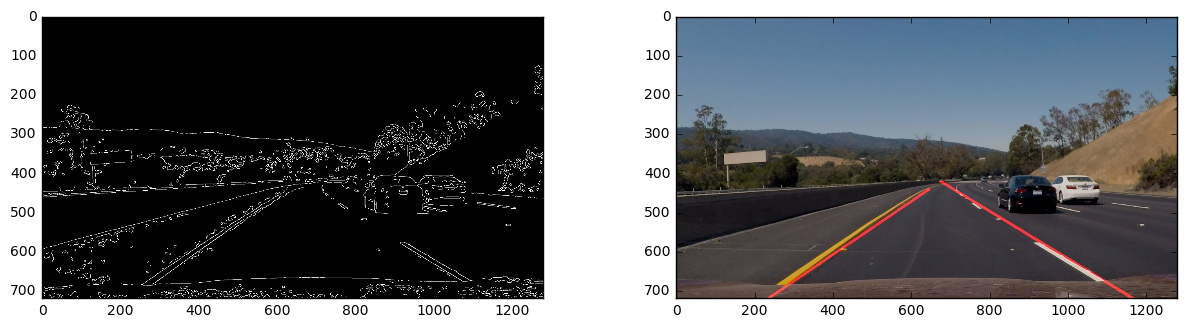

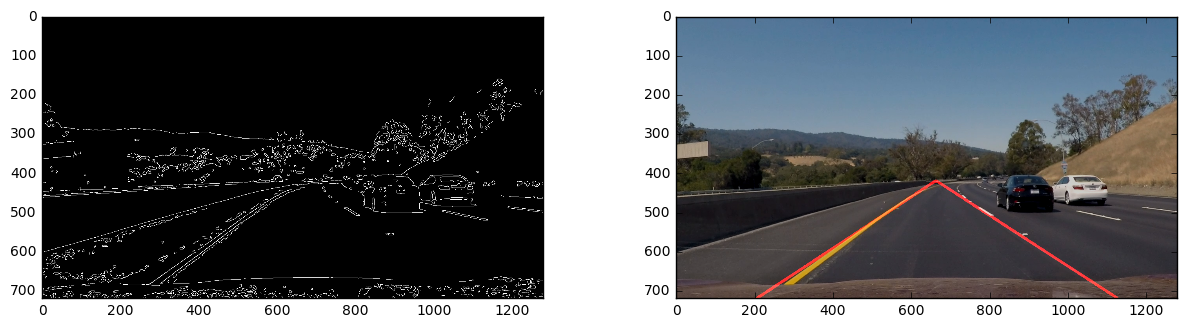

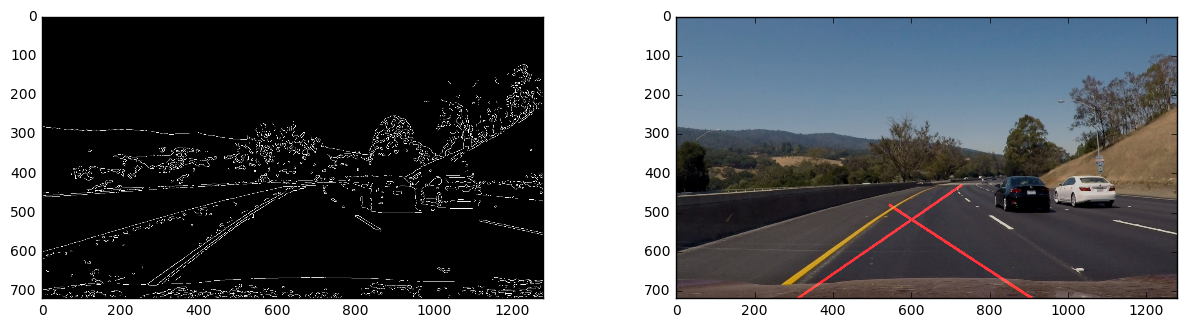

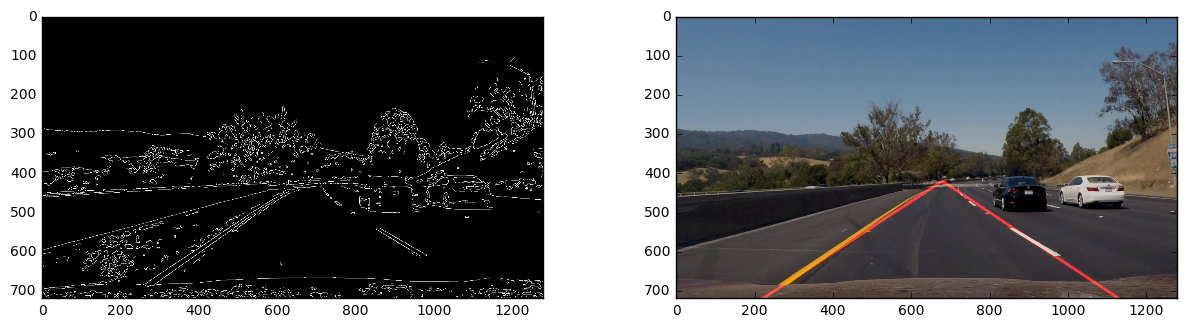

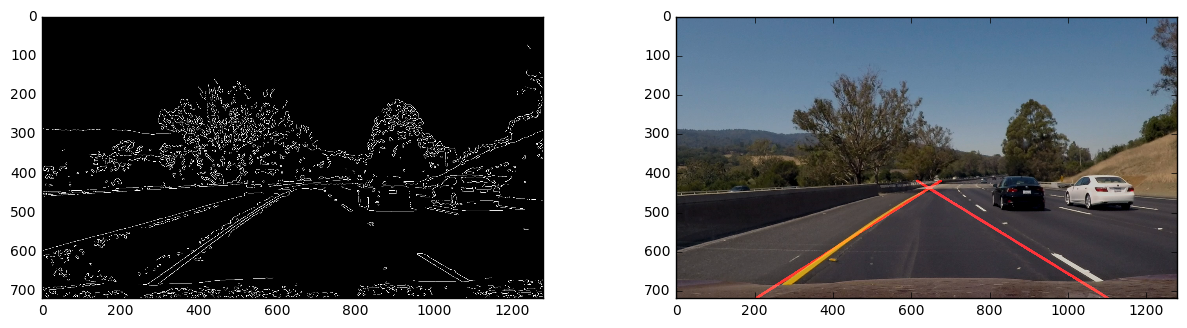

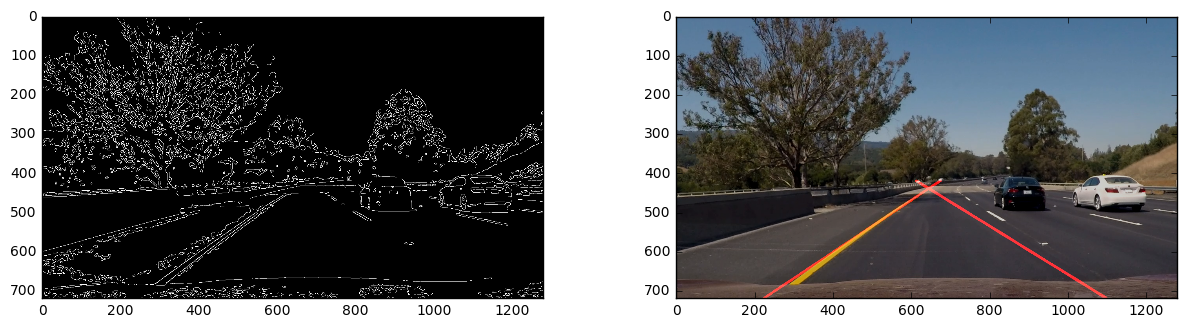

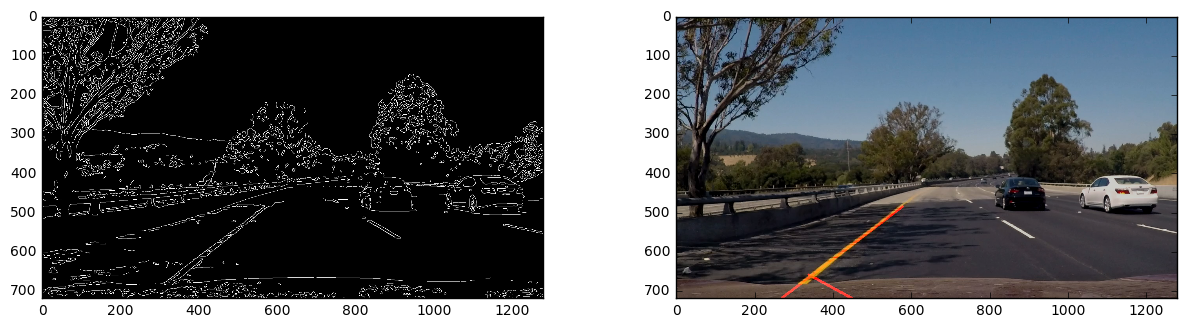

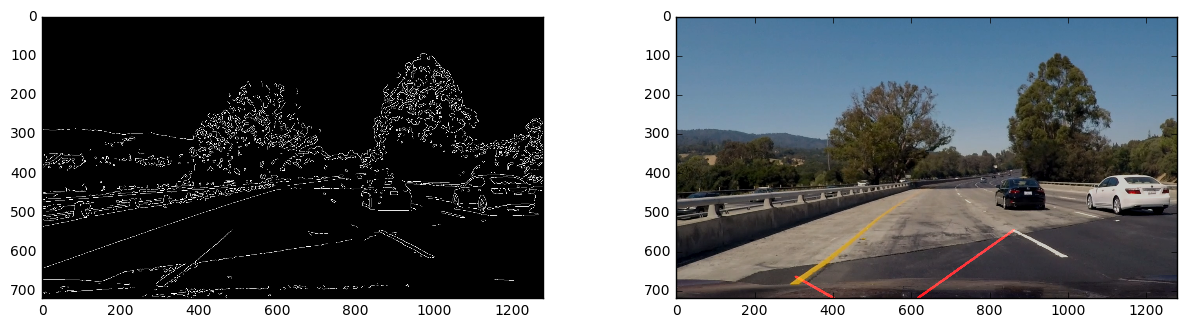

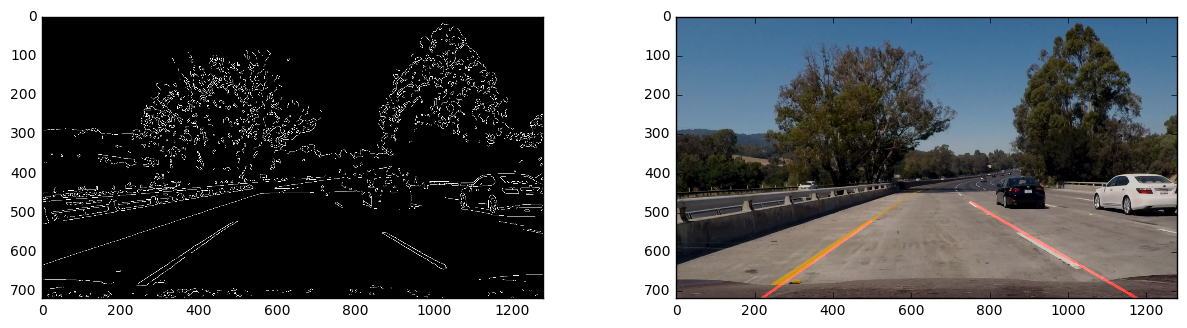

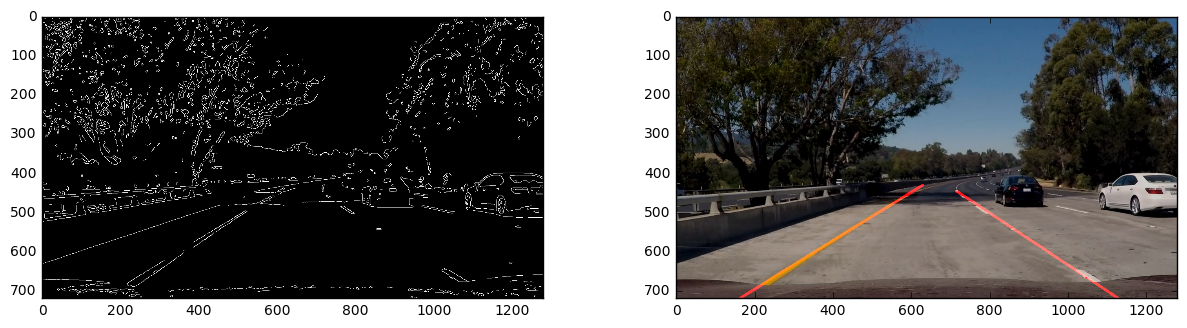

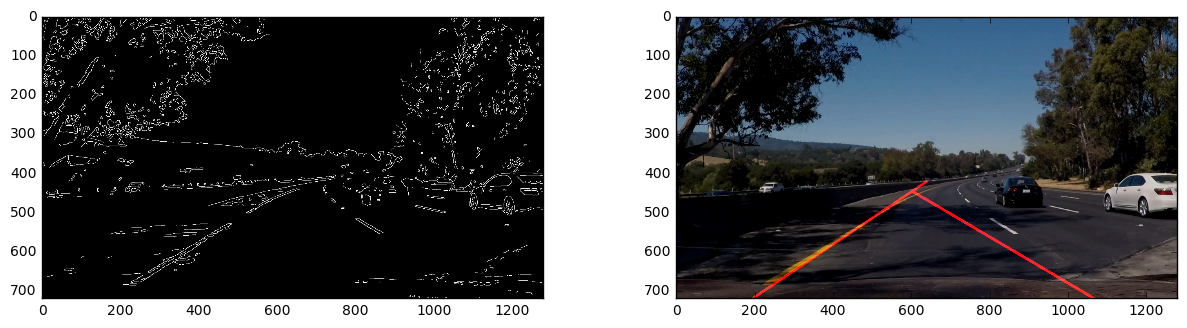

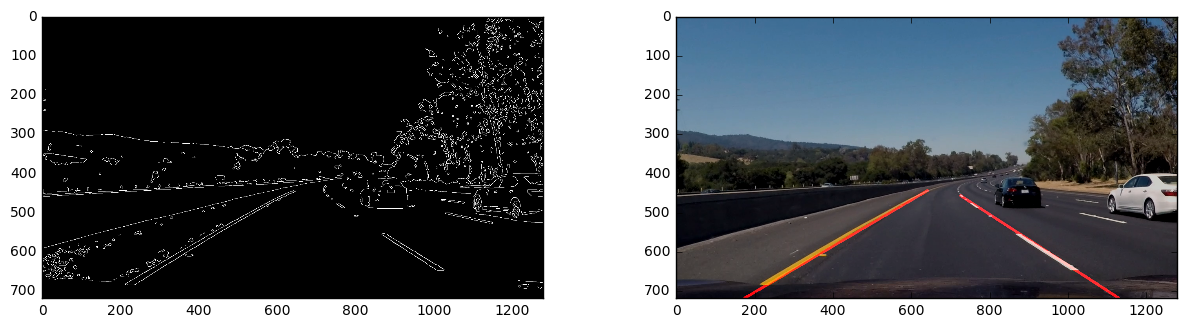

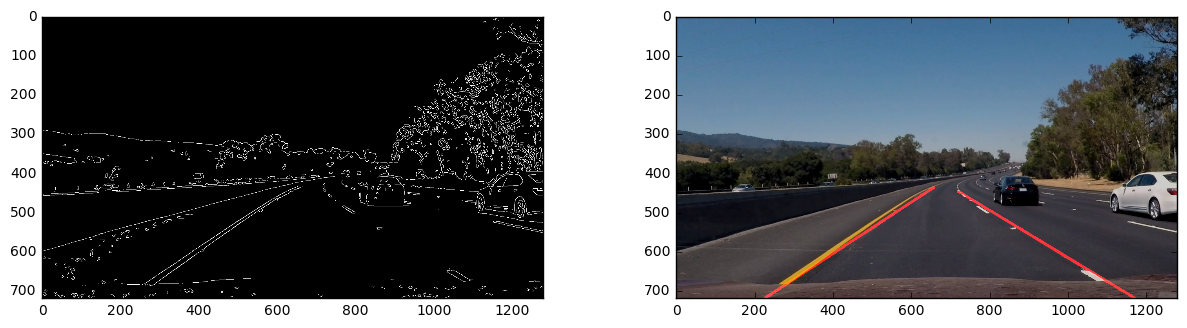

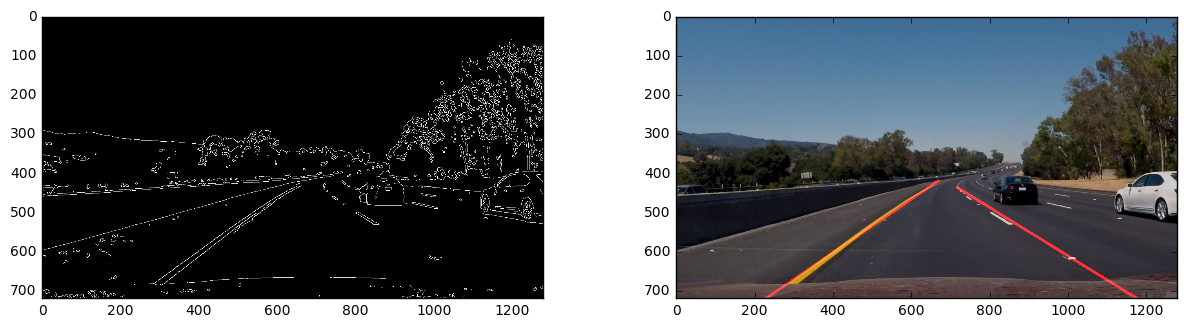

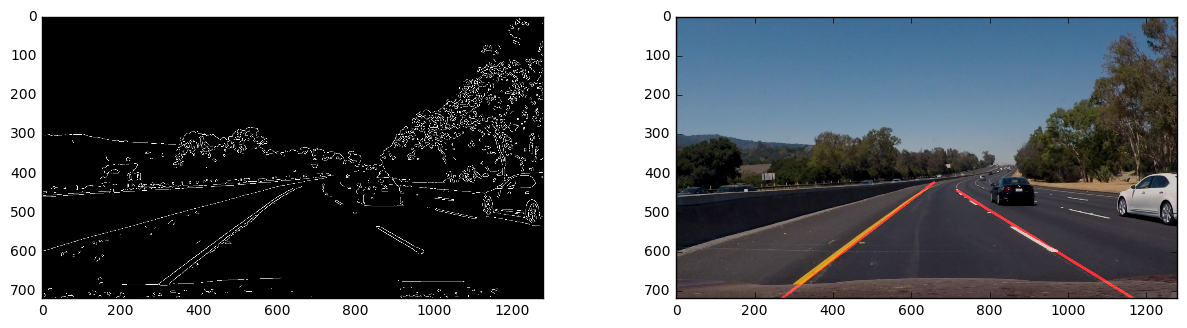

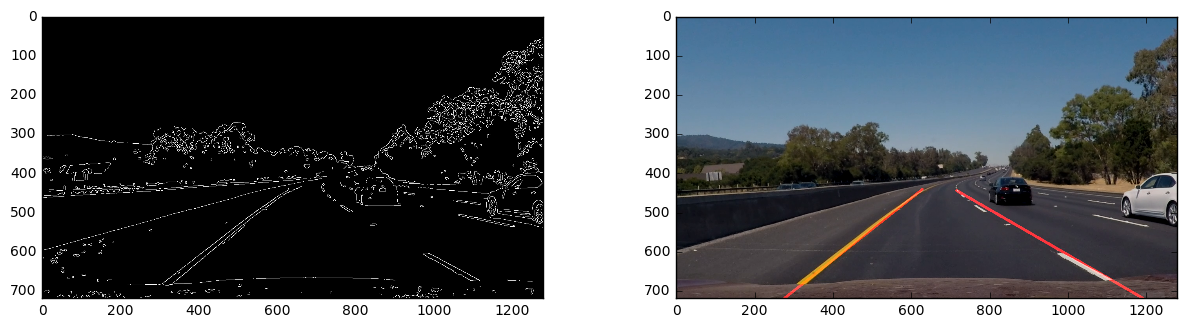

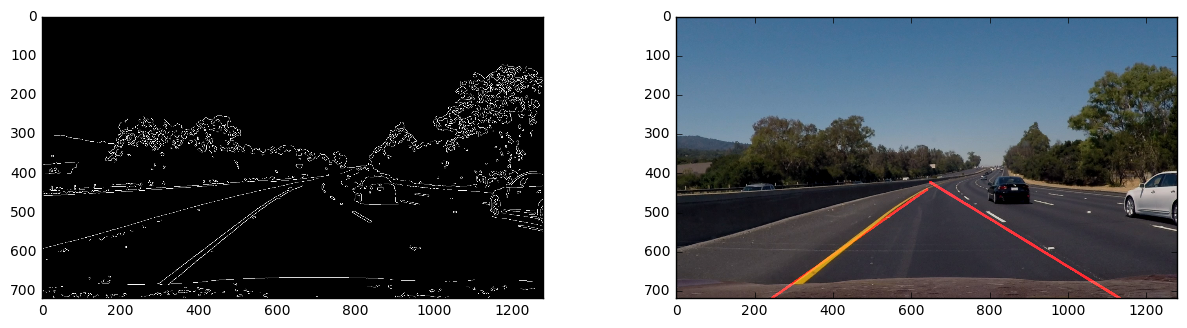

In [48]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

for i in range(0, len(frame_list)-1, 15) :
    c1_img = frame_list[i]
    if c1_img.shape[2] != 3:
        c1_img = c1_img[:,:,:-1]
    c1_col = yellowscale_new(c1_img)
    # c1_colSel = color_select(c1_img)
    c1_grey = grayscale(c1_col)
    c1_smooth = gaussian_blur(c1_grey, 7)
    c1_canny = canny(c1_smooth, 100, 150)
    mask = np.array([[150,720], [1200,720], [720,420], [600,420]], np.int32)
    c1_mask = region_of_interest(c1_canny, [mask])
    #  all_lines, no_OfImgToAvg,
    c1_hough, points_list = hough_lines_avg(c1_mask,  1, (np.pi/180)*1, 15, 5, 20, [[],[]], 30)
    c1_weight = weighted_img(c1_hough, c1_img)
    print(points_list)

#     print(c1_img.shape)
    # fig = plt.figure()
    # fig.add_subplot(111)

    # plt.figure()
    plt.figure(figsize=(15,8))

#     plt.subplot(2,2,1)
#     plt.imshow(c1_col, cmap='Greys_r')

    # plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(c1_canny, cmap='Greys_r')

#     # plt.figure()
#     plt.subplot(2,2,3)
#     plt.imshow(c1_mask, cmap='Greys_r')

    # plt.figure()
    plt.subplot(2,2,2)
    plt.imshow(c1_weight, cmap='Greys_r')

# [30,540], [875,540], [500,310]
# [150,720], [1200,720], [700,450]

[(861.0, 546.0, 616.0, 720.0), (305.0, 665.0, 402.0, 720.0)]


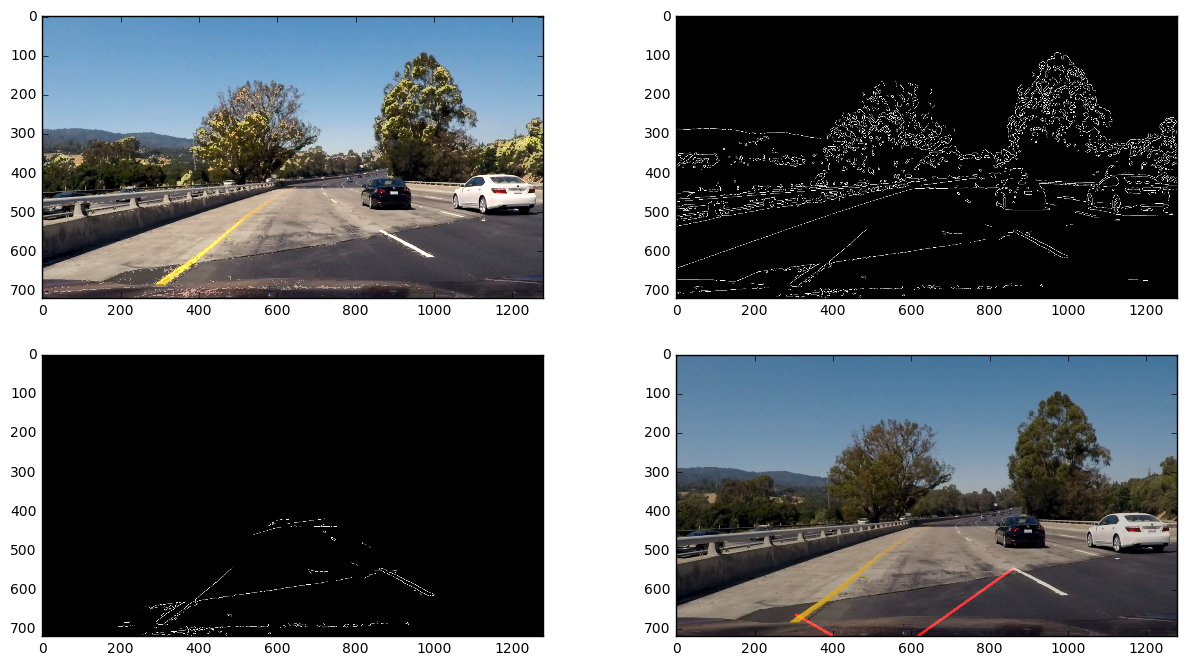

In [47]:

c1_img = frame_list[105]
if c1_img.shape[2] != 3:
    c1_img = c1_img[:,:,:-1]
c1_col = yellowscale_new(c1_img)
# c1_colSel = color_select(c1_img)
c1_grey = grayscale(c1_col)
c1_smooth = gaussian_blur(c1_grey, 7)
c1_canny = canny(c1_smooth, 100, 150)
mask = np.array([[150,720], [1200,720], [720,420], [600,420]], np.int32)
c1_mask = region_of_interest(c1_canny, [mask])
#  all_lines, no_OfImgToAvg,
c1_hough, points_list = hough_lines_avg(c1_mask, 1, (np.pi/180)*1, 15, 5, 20, [[],[]], 10)
c1_weight = weighted_img(c1_hough, c1_img)
print(points_list)

#     print(c1_img.shape)
# fig = plt.figure()
# fig.add_subplot(111)

# plt.figure()
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.imshow(c1_col, cmap='Greys_r')

# plt.figure()
plt.subplot(2,2,2)
plt.imshow(c1_canny, cmap='Greys_r')

#     # plt.figure()
plt.subplot(2,2,3)
plt.imshow(c1_mask, cmap='Greys_r')

# plt.figure()
plt.subplot(2,2,4)
plt.imshow(c1_weight, cmap='Greys_r')

# [30,540], [875,540], [500,310]
# [150,720], [1200,720], [700,450]

In [49]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image_c)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4


100%|██████████| 251/251 [00:42<00:00,  6.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 25.3 s, sys: 6.54 s, total: 31.8 s
Wall time: 45.5 s


In [50]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))